# Reddit analysis
// TODO: description

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Helper functions

reddit_data_path = "ASM_PZ2_podaci_2122/reddit2008"
submission_dataPath = f"{reddit_data_path}/submissions_2008_asm/"
comments_dataPath = f"{reddit_data_path}/comments_2008_asm_v1.1/comments_2008/"


def loadDataSet(folderPath):
    allFileData = pd.DataFrame([])
    for fileName in os.listdir(folderPath):
        singleFileData = pd.read_csv(folderPath + fileName)
        allFileData = pd.concat([allFileData, singleFileData])

    return allFileData


def groupby_count(data_frame, groupby_list):
    return data_frame.groupby(groupby_list).size().reset_index(name="counts")


def groupby_count_sorted(data_frame, groupby_list):
    return groupby_count(data_frame, groupby_list).sort_values('counts', ascending=False)

In [3]:
# Load data from CSVs and filter it
submissionData = loadDataSet(submission_dataPath)
commentsData = loadDataSet(comments_dataPath)

# It is possible to have "[deleted]" as author name
submissionFilter = submissionData["author"] != "[deleted]"
commentsFilter = commentsData["author"] != "[deleted]"

filteredSubmissions = submissionData[submissionFilter]
filteredComments = commentsData[commentsFilter]

allData = pd.concat([filteredSubmissions, filteredComments])

C:\Users\Bogdan\AppData\Local\Temp\ipykernel_9256\1346193589.py:11: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  singleFileData = pd.read_csv(folderPath + fileName)
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_9256\1346193589.py:11: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  singleFileData = pd.read_csv(folderPath + fileName)
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_9256\1346193589.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  singleFileData = pd.read_csv(folderPath + fileName)
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_9256\1346193589.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  singleFileData = pd.read_csv(folderPath + fileName)


In [6]:
allSubredditIds = np.union1d(submissionData['subreddit_id'], commentsData['subreddit_id'])
print(f"Number of different subreddits: {len(allSubredditIds)}")

commentsPerSubreddit = groupby_count_sorted(commentsData, ["subreddit_id"])
print(f"Comments per subreddit:\n{commentsPerSubreddit[:1]}")

# subreddit - author - count interactions
interactionsPerAuthorPerSubreddit = groupby_count(allData, ["subreddit_id", "author"])
# subreddit - count authors
authorsPerSubreddit = groupby_count_sorted(interactionsPerAuthorPerSubreddit, ["subreddit_id"])
print(f"Authors per subreddit:\n{authorsPerSubreddit[:1]}")

print(f"AVG number users per subreddit:\n{authorsPerSubreddit['counts'].sum() / len(allSubredditIds)}")

submissionsPerAuthor = groupby_count_sorted(filteredSubmissions, ['author'])
commentsPerAuthor = groupby_count_sorted(filteredComments, ['author'])
print(f"Max submissions per author:\n{submissionsPerAuthor[:1]}")
print(f"Max comments per author:\n{commentsPerAuthor[:1]}")

# author - subreddit - count interactions
interactionsPerSubredditPerAuthor = groupby_count(allData, ['author', 'subreddit_id'])
# author - count subreddits
subredditsPerAuthor = groupby_count_sorted(interactionsPerSubredditPerAuthor, ['author'])
print(f"Subreddits per author:\n{subredditsPerAuthor[:1]}")

Number of different subreddits: 5032
Comments per subreddit:
     subreddit_id   counts
2689         t5_6  1884629
Authors per subreddit:
     subreddit_id  counts
4354         t5_6  163779
AVG number users per subreddit:
128.78199523052464
Max submissions per author:
      author  counts
84823    gst   18870
Max comments per author:
                author  counts
12598  NoMoreNicksLeft   13480
Subreddits per author:
         author  counts
26168  MrKlaatu     181


Pearson correlation matrix:
                    counts_submissions  counts_comments
counts_submissions            1.000000         0.150412
counts_comments               0.150412         1.000000


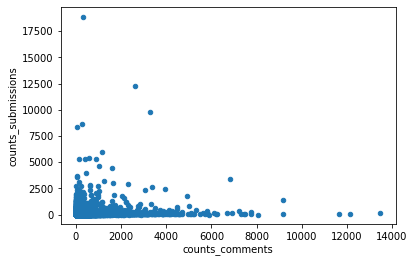

In [33]:
paersonCalculation = submissionsPerAuthor.copy().merge(commentsPerAuthor.copy(), on="author", how="inner", suffixes=["_submissions", "_comments"])
paersonCalculation.plot.scatter(y="counts_submissions", x="counts_comments")
print(f"Pearson correlation matrix:\n{paersonCalculation.corr(method='pearson')}")

In [62]:
filterNonOver18 = submissionData["over_18"] == False
filteredSubmissionsNonOver18 = submissionData[filterNonOver18]
commentsDataSubmissionId = groupby_count_sorted(commentsData, ["link_id"]).rename(columns={"link_id": "id"})
filteredSubmissionsNonOver18JoinedComments = filteredSubmissionsNonOver18.merge(commentsDataSubmissionId, how="inner", on="id")
print(filteredSubmissionsNonOver18JoinedComments[:10])

Empty DataFrame
Columns: [Unnamed: 0, id, url, permalink, author, created_utc, subreddit, subreddit_id, num_comments, score, over_18, distinguished, domain, stickied, locked, hide_score, counts]
Index: []


Network Development